In [1]:
#Importo Librerías a utilizar en la entrega
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Conectamos al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Carpeta donde se encuentra la notebook
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [4]:
#Cargo e inspecciono el DataSet

df_DatosExamenes = pd.read_csv('FactoresDeRendimientoEnExamenes.csv')
df_DatosExamenes.head()

#Se verifican las distintas variables que pueden ser válidas para el análisis a realizar y poder plantear las distintas hipótesis
#Entre estas variables se encuentran las siguientes (nombro algunas de las que voy a tener en cuenta en la definición de las hipótesis):
#      Horas de Estudio del alumno
#      % Asistencia en el cursado
#      Involucramiento de los padres
#      Nivel de Motivación del alumno
#      Nivel de Ingreso del grupo familiar


,Horas_Estudio,Asistencia,Involucramiento_Padres,Nivel_Recursos,Actividades_Extracurriculares,Horas_Suenio,Notas_Previas,Nivel_Motivacion,Acceso_Internet,Clases_con_Tutor,Ingresos_Familiares,Calidad_Docente,Tipo_Escuela,Influencia_de_Pares,Actividad_Fisica,Dificultades_Aprendizaje,Nivel_Educacion_Padres,Distancia_Escuela,Sexo,Nota_Examen
0,23,84,Bajo,Alto,No,7,73,Bajo,Si,0,Bajo,Medio,Publico,Positivo,3,No,Secundario,Cerca,Masculino,67
1,19,64,Bajo,Medio,No,8,59,Bajo,Si,2,Medio,Medio,Publico,Negativo,4,No,Universitario,Medio,Femenino,61
2,24,98,Medio,Medio,Si,7,91,Medio,Si,2,Medio,Medio,Publico,Neutral,4,No,Posgrado,Cerca,Masculino,74
3,29,89,Bajo,Medio,Si,8,98,Medio,Si,1,Medio,Medio,Publico,Negativo,4,No,Secundario,Medio,Masculino,71
4,19,92,Medio,Medio,Si,6,65,Medio,Si,3,Medio,Alto,Publico,Neutral,4,No,Universitario,Cerca,Femenino,70


In [5]:
#Obtengo información adicional del dataset
df_DatosExamenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Horas_Estudio                  6607 non-null   int64 
 1   Asistencia                     6607 non-null   int64 
 2   Involucramiento_Padres         6607 non-null   object
 3   Nivel_Recursos                 6607 non-null   object
 4   Actividades_Extracurriculares  6607 non-null   object
 5   Horas_Suenio                   6607 non-null   int64 
 6   Notas_Previas                  6607 non-null   int64 
 7   Nivel_Motivacion               6607 non-null   object
 8   Acceso_Internet                6607 non-null   object
 9   Clases_con_Tutor               6607 non-null   int64 
 10  Ingresos_Familiares            6607 non-null   object
 11  Calidad_Docente                6529 non-null   object
 12  Tipo_Escuela                   6607 non-null   object
 13  Inf

In [6]:
#Otros datos de interés
df_DatosExamenes.describe()

,Horas_Estudio,Asistencia,Horas_Suenio,Notas_Previas,Clases_con_Tutor,Actividad_Fisica,Nota_Examen
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
#Verifico datos NULOS en el dataset
#y calculo los totales
df_DatosExamenes.isna().sum()
#Se verifican que en 3 campos se encuentran valores nulos. Como esas variables no serán tenidas en cuenta para la verificación de hipotesis
#las completo con valores 0

,0
Horas_Estudio,0
Asistencia,0
Involucramiento_Padres,0
Nivel_Recursos,0
Actividades_Extracurriculares,0
Horas_Suenio,0
Notas_Previas,0
Nivel_Motivacion,0
Acceso_Internet,0
Clases_con_Tutor,0


In [8]:
#Completo los NULOS con valor 0
df_DatosExamenes.fillna(0, inplace=True)
#Verificación
df_DatosExamenes.isna().sum()

,0
Horas_Estudio,0
Asistencia,0
Involucramiento_Padres,0
Nivel_Recursos,0
Actividades_Extracurriculares,0
Horas_Suenio,0
Notas_Previas,0
Nivel_Motivacion,0
Acceso_Internet,0
Clases_con_Tutor,0


In [9]:
#Creo una nueva columna para analizar calificaciones altas o Aprobados
#Calificación Alta: 'Nota Alta' si es mayor a 70, sino 'Nota Baja' (Supongo que se aprueba con 70)
df_DatosExamenes['Nota_Alta_Examen'] = np.where(df_DatosExamenes['Nota_Examen'] >= 70, 'Nota Alta', 'Nota Baja')

In [ ]:
#Hipotesis sobre los datos
#Se investigará sobre los factores que influyen en la aprobación o no de un examen.
#Intentanto explicar la relación que existe en algunas variables y las nota obtenidas

#1- Existe un relación positiva entre las Horas de Estudio del alumno y las calificaciones
#2- Existe un relación positiva entre el % Asistencia en el cursado del alumno y las calificaciones
#3- Existe un relación positiva entre el Involucramiento de los padres y las calificaciones
#4- Existe un relación positiva entre los Ingresos Familiares del alumno y las calificaciones
#5- Existe un relación positiva entre el Nivel de Motivación del alumno y las calificaciones

Text(0, 0.5, 'Frecuencia')

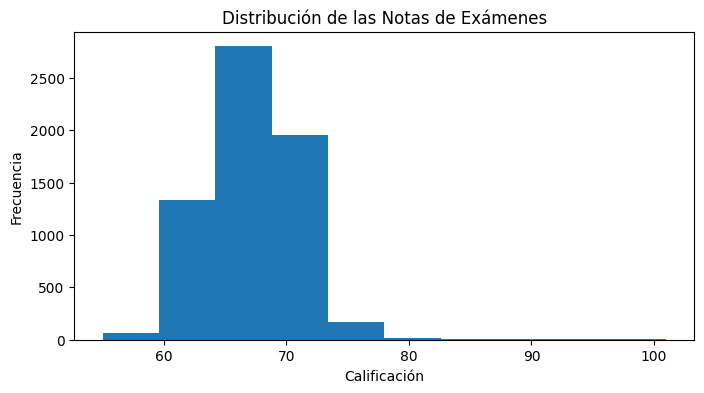

In [ ]:
#Grafico la distribución de las notas de los alumnos
fig, axes = plt.subplots(figsize=(8, 4))
axes.hist(df_DatosExamenes['Nota_Examen'])
axes.set_title('Distribución de las Notas de Exámenes')
axes.set_xlabel('Calificación')
axes.set_ylabel('Frecuencia')


Text(0, 0.5, 'Calificaciones')

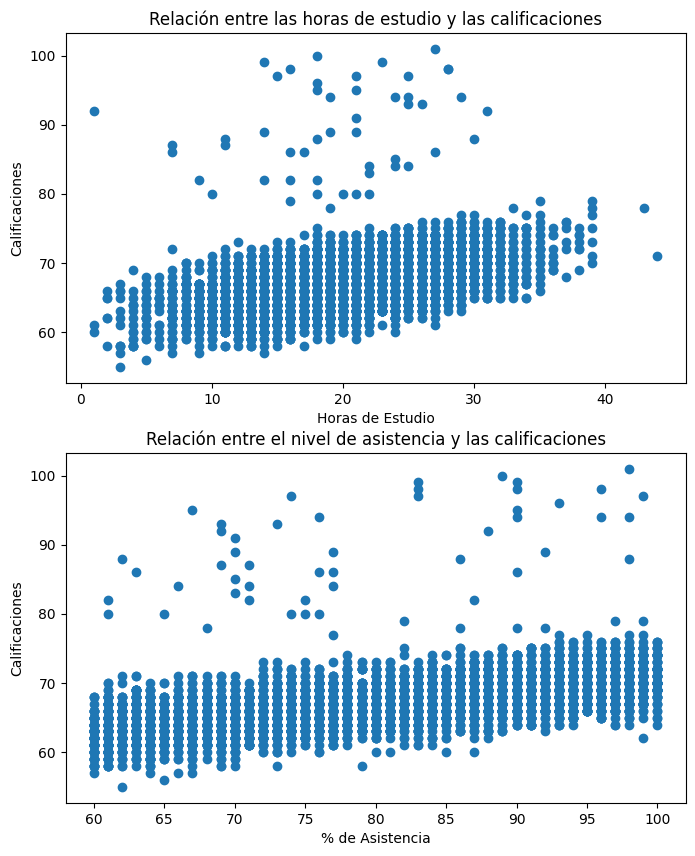

In [135]:
#Relación de las horas de estudio con respecto a las nota obtenidas
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
axes[0].scatter(df_DatosExamenes['Horas_Estudio'], df_DatosExamenes['Nota_Examen'], )
axes[0].set_title('Relación entre las horas de estudio y las calificaciones')
axes[0].set_xlabel('Horas de Estudio')
axes[0].set_ylabel('Calificaciones')

axes[1].scatter(df_DatosExamenes['Asistencia'], df_DatosExamenes['Nota_Examen'])
axes[1].set_title('Relación entre el nivel de asistencia y las calificaciones')
axes[1].set_xlabel('% de Asistencia')
axes[1].set_ylabel('Calificaciones')

#A través de las gráficas realizadas se verifica que se observa una tendencia positiva entre las horas de
#estudio del alumno y las calificaciones obtenidas.

#Lo mismo aplica para el porcentaje de asistencia, a mayor % de asistencia hay una leve tendencia a obtenerse mejores resultados.


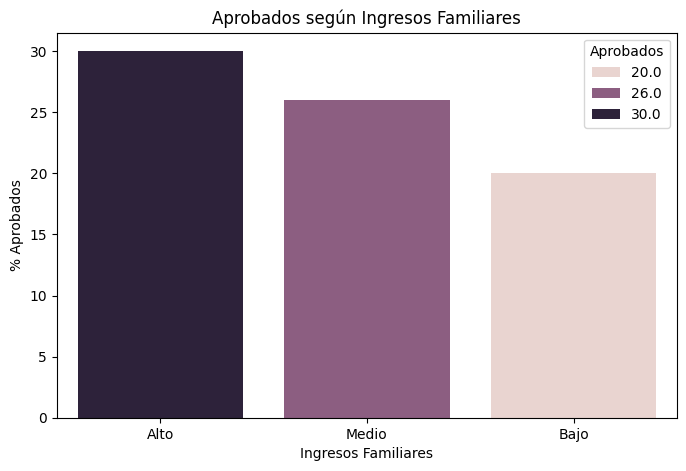

In [137]:
# Ingresos Familiares
#Genero DataFrames filtrados segun los ingresos
#Calculo las cantidades de acuerdo a los ingresos
df_Ingresos_Altos = df_DatosExamenes[df_DatosExamenes['Ingresos_Familiares']=='Alto']
df_Ingresos_Medios = df_DatosExamenes[df_DatosExamenes['Ingresos_Familiares']=='Medio']
df_Ingresos_Bajo = df_DatosExamenes[df_DatosExamenes['Ingresos_Familiares']=='Bajo']

#print(df_Ingresos_Altos.shape[0]) #1269
#print(df_Ingresos_Medios.shape[0]) #2666
#print(df_Ingresos_Bajo.shape[0]) #2672

#Calculo la cantidad de notas altas alcanzadas segun cada nivel de Ingresos
df_Ingresos_Altos[df_Ingresos_Altos['Nota_Alta_Examen']=='Nota Alta'].shape[0]  #Cantidad de aprobados de Ingresos Altos
df_Ingresos_Medios[df_Ingresos_Medios['Nota_Alta_Examen']=='Nota Alta'].shape[0]  #Cantidad de aprobados de Ingresos Medios
df_Ingresos_Bajo[df_Ingresos_Bajo['Nota_Alta_Examen']=='Nota Alta'].shape[0] #Cantidad de aprobados de Ingresos Bajos

#Calculo Promedios de aprobados según nivel de ingresos de los padres
Promedio_Ingresos_Bajo = round(df_Ingresos_Bajo[df_Ingresos_Bajo['Nota_Alta_Examen']=='Nota Alta'].shape[0] / df_Ingresos_Bajo.shape[0],1) * 100
Promedio_Ingresos_Medios = round(df_Ingresos_Medios[df_Ingresos_Medios['Nota_Alta_Examen']=='Nota Alta'].shape[0] / df_Ingresos_Medios.shape[0],2) * 100
Promedio_Ingresos_Altos = round(df_Ingresos_Altos[df_Ingresos_Altos['Nota_Alta_Examen']=='Nota Alta'].shape[0] / df_Ingresos_Altos.shape[0],1)  * 100

#Con estos datos creo un nuevo dataframe
data = {'Ingresos_Familiares': ('Alto', 'Medio', 'Bajo'),
        'Aprobados': (Promedio_Ingresos_Altos, Promedio_Ingresos_Medios, Promedio_Ingresos_Bajo)
}

plt.figure(figsize=(8, 5))
sns.barplot(x='Ingresos_Familiares', y='Aprobados', data=data, hue='Aprobados' )
plt.xlabel('Ingresos Familiares')
plt.ylabel('% Aprobados')
plt.title('Aprobados según Ingresos Familiares')
#plt.tight_layout()
plt.show()

#A través del análisis realizado se oberva que a mayores ingresos del grupo familiar, en promedio se obtiene un mayor nivel de aprobación en
#los exámenes

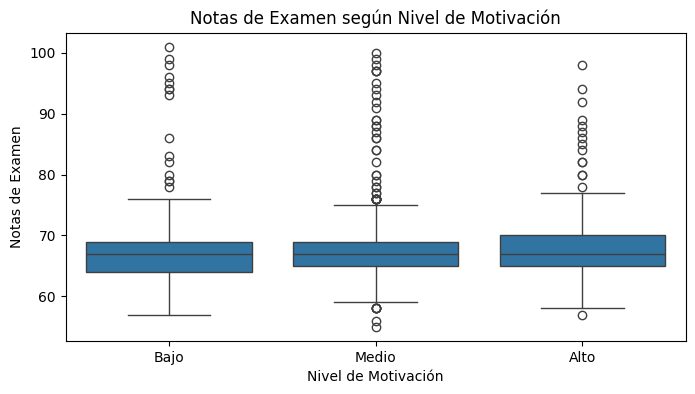

In [140]:
#Para verificar la relación entre el nivel de motivación de los alumnos se realizar un BoxPlot
#Como resultado se verifica que a mayores niveles de motivación en general se obtienen mejores resultados

plt.figure(figsize=(8, 4))
sns.boxplot(x='Nivel_Motivacion', y='Nota_Examen', data=df_DatosExamenes)
plt.xlabel('Nivel de Motivación')
plt.ylabel('Notas de Examen')
plt.title('Notas de Examen según Nivel de Motivación')
plt.show()

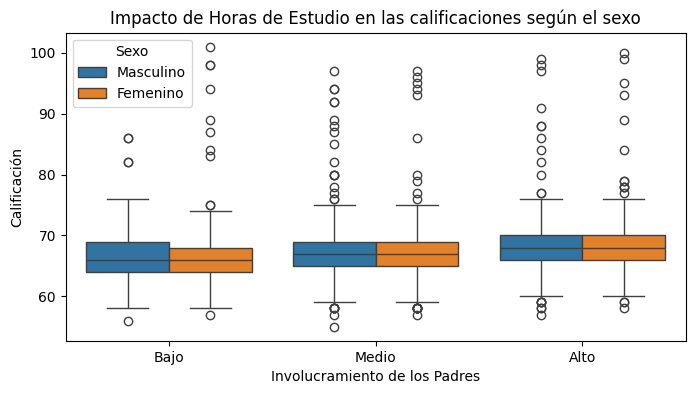

In [142]:
#Para verificar la relación entre el nivel de motivación de los alumnos se realizar un BoxPlot
#Como resultado se verifica que a mayores niveles de Involucramiento de los Padres se obtienen mejores resultados

plt.figure(figsize=(8, 4))
sns.boxplot (x='Involucramiento_Padres', y='Nota_Examen', data=df_DatosExamenes, hue='Sexo')
plt.xlabel('Involucramiento de los Padres')
plt.ylabel('Calificación')
plt.title('Impacto del Involucramiento de los padres en las calificaciones según el sexo')
plt.xlabel('Involucramiento de los Padres')
plt.ylabel('Calificación')
plt.show()